In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('train_Ar copy.csv')

In [6]:
len(data)

3102

In [7]:
# drop rows where the 'tweet' value is NaN
data = data[data['tweet'].notna()]

In [9]:

len(data)

3102

In [11]:
# get all duplicate tweets in the dataset
duplicate_data = data[data.duplicated(subset=['tweet'], keep=False)]
duplicate_data

,id,tweet,sarcastic,rephrase,dialect


In [12]:
# get positive examples
positive = data[data['sarcastic'] == 1]
len(positive)

745

In [13]:
# sample negative examples equal to the number of positive examples 
negative = data[data['sarcastic'] == 0].sample(n=len(positive), random_state=10)
len(negative)

745

In [14]:
# concatenate positive and negative to get balanced data
balanced_data = pd.concat([positive, negative])

Validation and training splits: 

In [15]:
half_val_size = len(positive) // 10
print("Target num of validation examples for each class:", half_val_size)

Target num of validation examples for each class: 74


In [16]:
# sample the target number of positive and negative validation examples
val_positive = positive.sample(n=half_val_size, random_state=10)
val_negative = negative.sample(n=half_val_size, random_state=10)

In [17]:
# concantenate positive and negative validation examples
validation = pd.concat([val_positive, val_negative])

In [18]:
# shuffle validation data
validation = validation.sample(frac=1)

In [19]:
# training data are the examples that do not appear in validation set
unused_balanced_data_indices = [index_value for index_value in balanced_data.index if index_value not in validation.index]
training = balanced_data.loc[unused_balanced_data_indices]

In [20]:
# shuffle training data
training = training.sample(frac=1)

In [21]:
len(validation)

148

In [22]:
len(training)

1342

In [23]:
training


,id,tweet,sarcastic,rephrase,dialect
1414,1415,عبر الناس داخل الكاتدرائية عن مشاعرهم بحرقة بع...,0,NaN,msa
700,701,وحده تقول : الرجوله افعال اما الشنب حتى صديقا...,1,وحده تقول : الرجوله افعال اما الشنب حتى النسا...,nile
554,555,لو انت لمستها هحطك تحتها,1,كلام تكاتك يعني لو قربت منها هدوسك بيها,nile
956,957,التغطية مستمرة لافروف : مقاتلو المعارضة الر...,0,NaN,msa
2895,2896,ده شغل برشام سواء كان من الكاتب والا المخرج ول...,0,NaN,nile
...,...,...,...,...,...
1556,1557,زد رصيدك35 المطيري ع قلوبهم .. التمو حزب حسب ا...,0,NaN,levant
531,532,المحن اشتغل اهوة وبعد كده هيجرو ورا بعض بالشبشب,1,البدايات تختلف عن النهايات البداية غزل والنهاي...,nile
3020,3021,بقالى فترة حياتى بايظه يا بختك عندك حياة يادى ...,0,NaN,nile
3002,3003,اللى حيجنن اسرائيل ازى عدوا من النفق ضيق اووى,0,NaN,nile


In [24]:
validation

,id,tweet,sarcastic,rephrase,dialect
305,306,حاسب روحو عنتر زمانو ههههههههههههههههههههههه...,1,متفكرش نفسك قوى أوى وانت مش كده,magreb
304,305,ماشالله حسام البدري اللعيبه اللي من دهب معاه تراب,1,حسام البدري مدرب فاشل,nile
2585,2586,أمير قطر السابق يشارك في جنازة كاسترو و يشكر...,0,NaN,gulf
27,28,تبدلني أنا 90 كيلو شحم ولحم بزوج كيلو بطاطا,1,تبدلني أنا بكل وزني بهذه النحيلة,magreb
2440,2441,محمد علي خير :قرار الرئيس عدلي منصور بتحصين...,0,NaN,msa
...,...,...,...,...,...
2603,2604,الله الله 😍 حزب الاعاده,0,NaN,nile
1440,1441,كل عام و أنتم بخير، تقبل الله منا و منكم صالح ...,0,NaN,msa
704,705,كان من الرائع اكتشاف امريكا ولكن كان اروع لو ل...,1,امريكا تشكل خطرا كبيرا على جميع الشعوب بما فيه...,msa
140,141,السوشيال قربت كل العالم من بعضه الا العرب فرقتهم,1,العرب بيتخانقوا على السوشيال ميديا بدل ما تقرب...,nile


In [25]:
# check for overlap between train and validation 
result = pd.concat([training, validation]).drop_duplicates(subset=['tweet'], keep=False)
print('Length of concatenated train and validation:', len(result))
print('Length of balanced data:', len(balanced_data))

Length of concatenated train and validation: 1490
Length of balanced data: 1490


# Check tweet length distribution in training and validation splits


Length of training tweets):


count    1342.000000
mean       65.009687
std        37.158656
min         5.000000
25%        35.000000
50%        55.000000
75%        93.000000
max       191.000000
dtype: float64

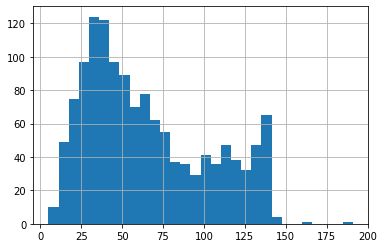

In [26]:
lengths = []

for index, row in training.iterrows():
  current_length = len(row['tweet'])
  lengths.append(current_length)

print("\nLength of training tweets):")
pd.Series(lengths).hist(bins = 30)
pd.Series(lengths).describe()


Length of validation tweets):


count    148.000000
mean      63.222973
std       35.705489
min       10.000000
25%       32.750000
50%       55.000000
75%       84.250000
max      140.000000
dtype: float64

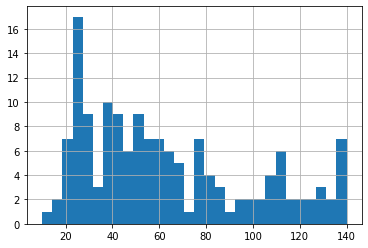

In [27]:
lengths = []

for index, row in validation.iterrows():
  current_length = len(row['tweet'])
  lengths.append(current_length)
  
print("\nLength of validation tweets):")
pd.Series(lengths).hist(bins = 30)
pd.Series(lengths).describe()

In [29]:
training.to_csv('balanced_train_Ar.csv')
validation.to_csv('balanced_validation_Ar.csv')